### 투빅스 15기 강지우 KNN assignment2
###  1) Preprocessing / EDA

In [18]:
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib
import math
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv('Mall_Customers.csv')

In [20]:
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [21]:
df.columns = ['id', 'gender', 'age', 'income', 'score']

In [22]:
df

,id,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [23]:
# id는 인덱스 요소이므로 제거
df.drop(['id'], axis=1,inplace=True)

In [24]:
df['gender'].replace({'Male':0, 'Female':1}, inplace=True)

In [25]:
df_origin = df.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001684E94E2C8>,
      dtype=object)

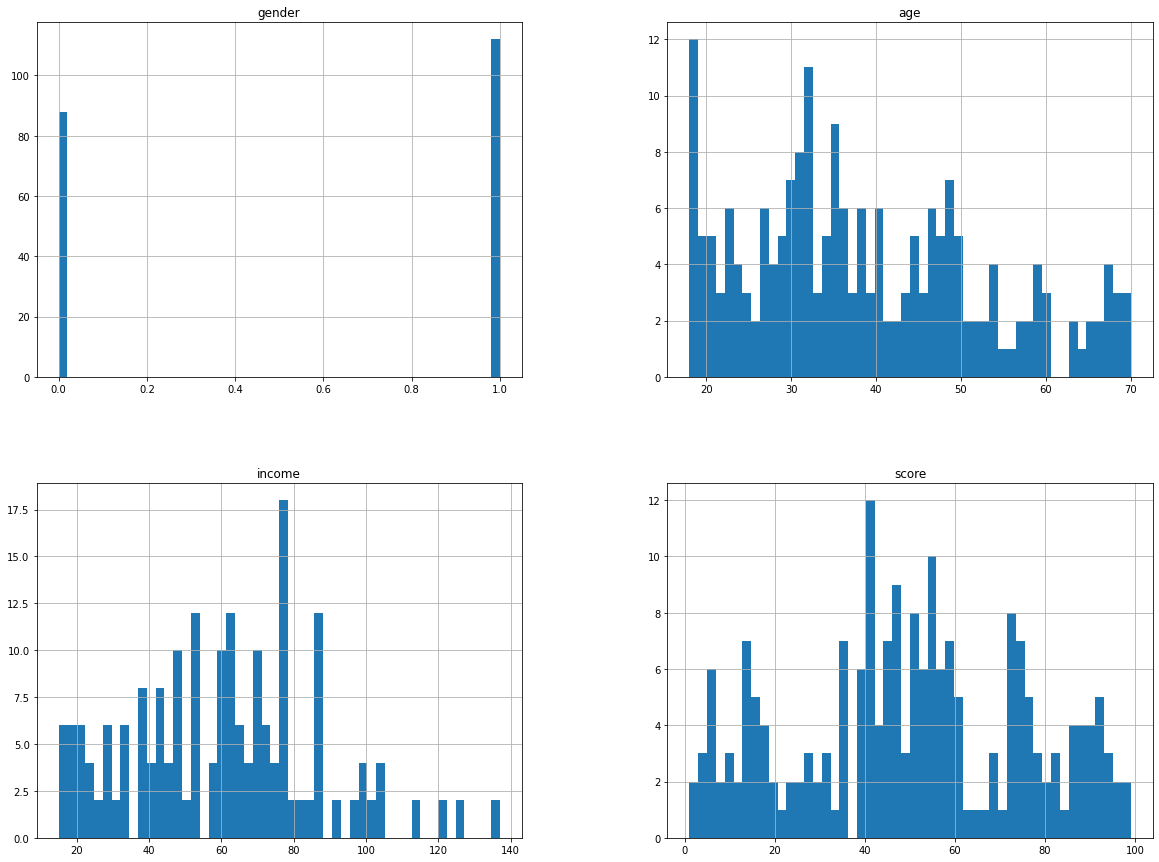

In [26]:
# gender, income, age, score
df.hist(bins=50, figsize=(20, 15))

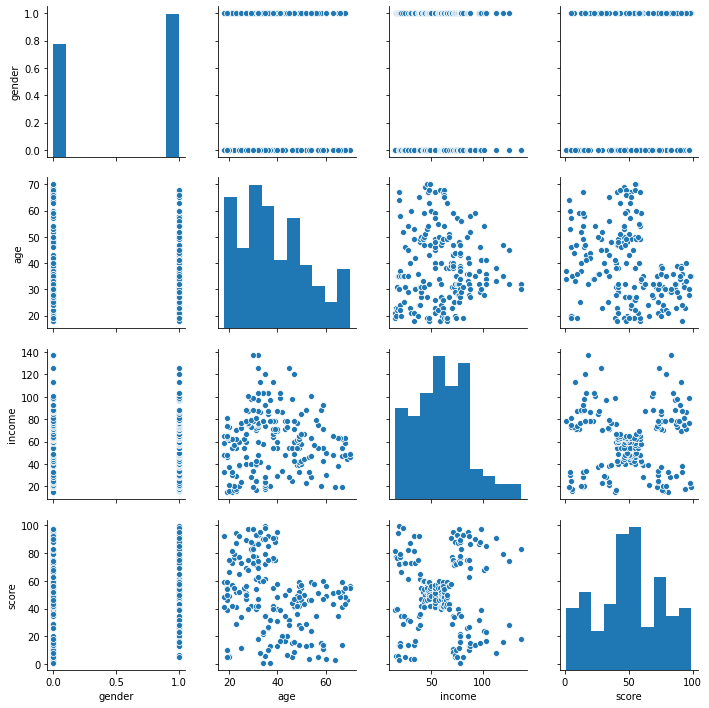

In [28]:
sns.pairplot(df)

score와 income의 분포그림이 군집성을 보이는 것 같다.

In [29]:
df.corr()

,gender,age,income,score
gender,1.000000,-0.060867,-0.056410,0.058109
age,-0.060867,1.000000,-0.012398,-0.327227
income,-0.056410,-0.012398,1.000000,0.009903
score,0.058109,-0.327227,0.009903,1.000000


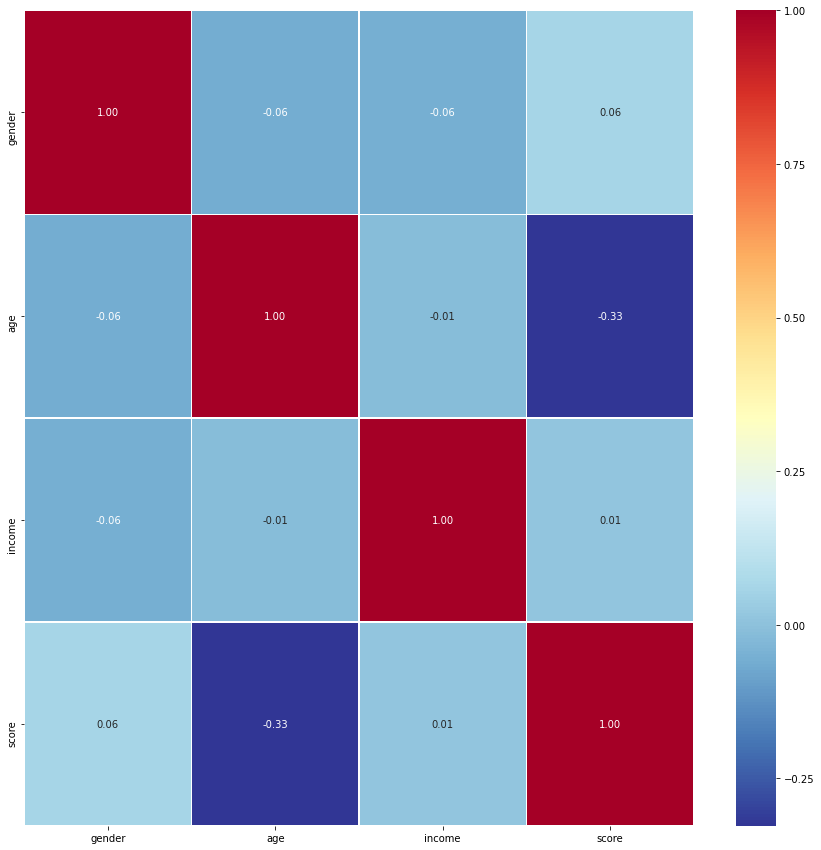

In [34]:
plt.figure(figsize=(15,15))
sns.heatmap(data = df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='RdYlBu_r')

age와 score가 가장 높은 상관관계를 보인다.

### 2) Clustering

### K-Means Clustering

In [77]:
cont_col = ['income', 'score', 'age']
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=5,random_state=42)
k_means.fit(df[cont_col])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

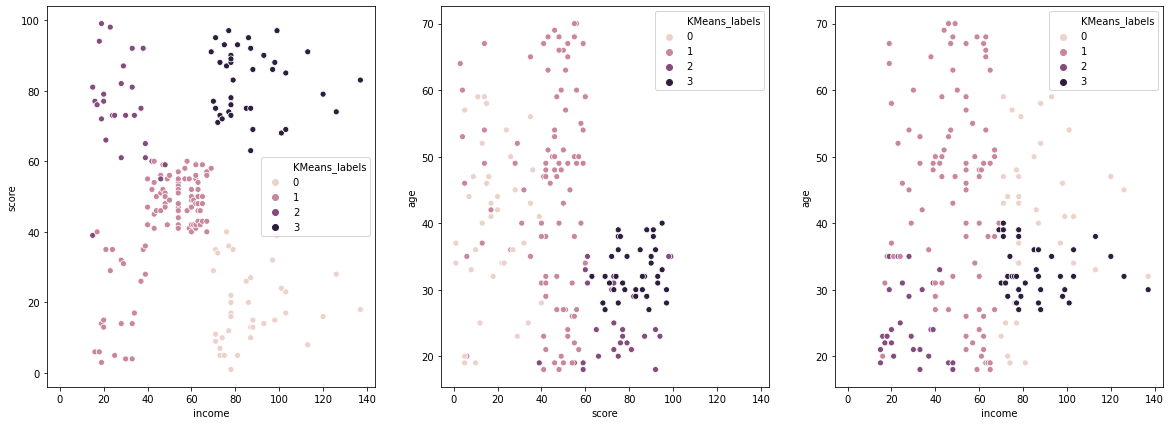

In [93]:
f, axes = plt.subplots(1, 3, figsize=(20, 7), sharex=True)
sns.scatterplot(x='income', y='score', data=df, hue=df['KMeans_labels'], ax=axes[0])
sns.scatterplot(x='score', y='age', data=df, hue=df['KMeans_labels'], ax=axes[1])
sns.scatterplot(x='income', y='age', data=df, hue=df['KMeans_labels'], ax=axes[2])

### DBSCAN

In [79]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN() # eps = 0.5 / min_samples = 5
dbscan.fit(df[cont_col])

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

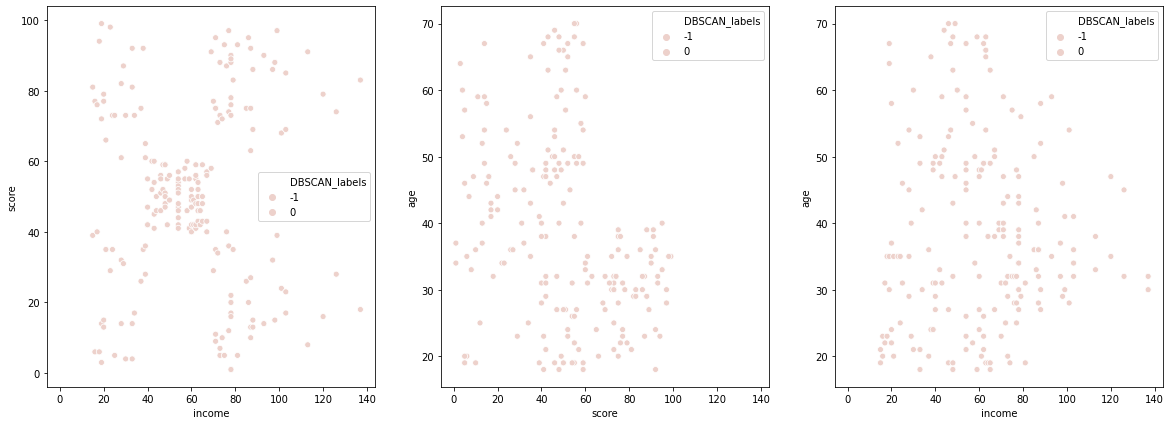

In [92]:
df['DBSCAN_labels']=dbscan.labels_ 

f, axes = plt.subplots(1, 3, figsize=(20, 7), sharex=True)
sns.scatterplot(x='income', y='score', data=df, hue=df['DBSCAN_labels'], ax=axes[0])
sns.scatterplot(x='score', y='age', data=df, hue=df['DBSCAN_labels'], ax=axes[1])
sns.scatterplot(x='income', y='age', data=df, hue=df['DBSCAN_labels'], ax=axes[2])

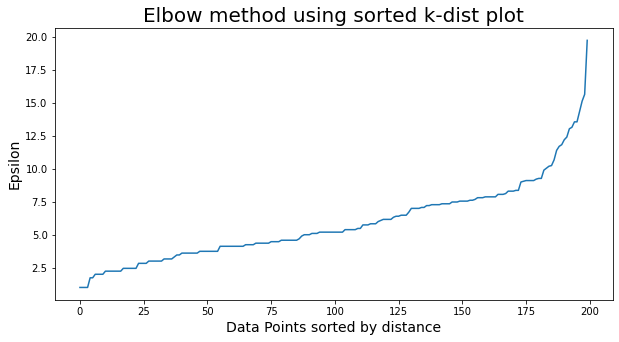

In [82]:
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=2)
neighbors = nn.fit(df[cont_col])
distances, indices = neighbors.kneighbors(df[cont_col])

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('Elbow method using sorted k-dist plot',fontsize=20) # K-distance Graph
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

In [87]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=14,min_samples=6)
dbscan_opt.fit(df[cont_col])

DBSCAN(algorithm='auto', eps=14, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [88]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

 0    112
 2     35
 3     23
-1     22
 1      8
Name: DBSCAN_opt_labels, dtype: int64

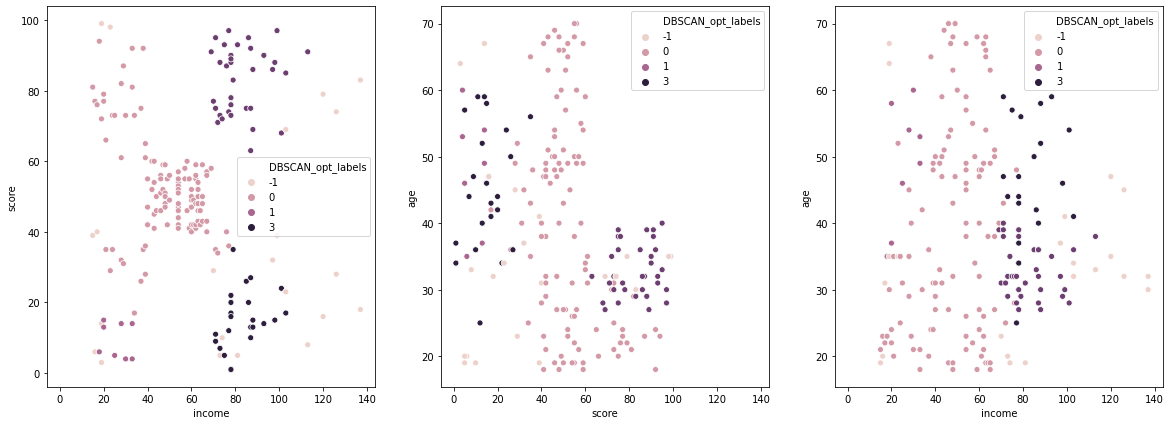

In [91]:
f, axes = plt.subplots(1, 3, figsize=(20, 7), sharex=True)
sns.scatterplot(x='income', y='score', data=df, hue=df['DBSCAN_opt_labels'], ax=axes[0])
sns.scatterplot(x='score', y='age', data=df, hue=df['DBSCAN_opt_labels'], ax=axes[1])
sns.scatterplot(x='income', y='age', data=df, hue=df['DBSCAN_opt_labels'], ax=axes[2])

### Agglomerative Hierarchical Clustering

In [97]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean')
model.fit(df[cont_col])

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

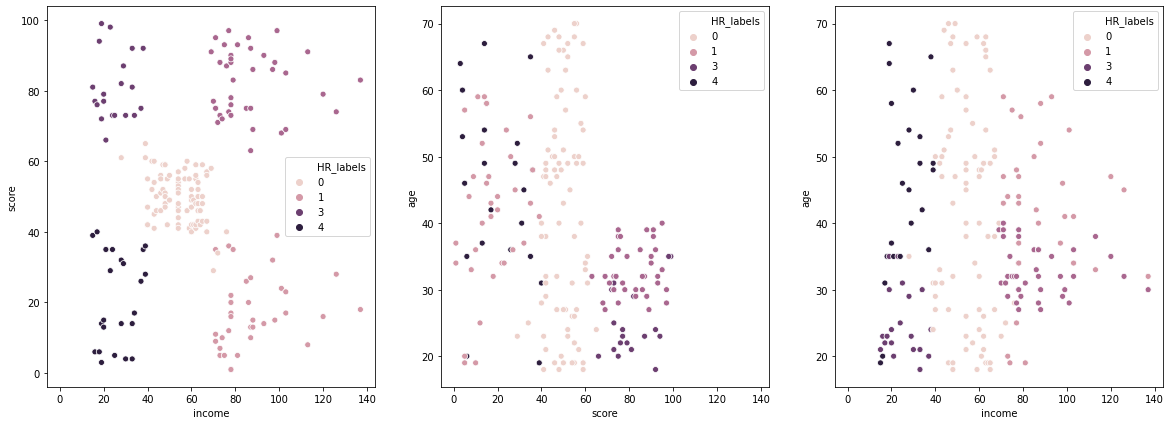

In [98]:
df['HR_labels']=model.labels_

f, axes = plt.subplots(1, 3, figsize=(20, 7), sharex=True)
sns.scatterplot(x='income', y='score', data=df, hue=df['HR_labels'], ax=axes[0])
sns.scatterplot(x='score', y='age', data=df, hue=df['HR_labels'], ax=axes[1])
sns.scatterplot(x='income', y='age', data=df, hue=df['HR_labels'], ax=axes[2])

In [106]:
from sklearn.metrics import silhouette_samples, silhouette_score

score_lst = []
pre_col = list(df.columns[4:])
pre_col.remove('DBSCAN_labels')
print(pre_col)
for i in pre_col:
    score = silhouette_score(df[cont_col], df[i], metric='euclidean')
    score_lst.append(score)

['KMeans_labels', 'DBSCAN_opt_labels', 'HR_labels']


In [107]:
print(score_lst)

[0.40546302077733304, 0.27732393550082574, 0.4401889024290193]


silhouette score는 위 3개의 모델 중 Agglomerative Hierarchical Clustering이 가장 높다.